# Machine Learning

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Introduction

In [3]:
housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')
type(housing)

pandas.core.frame.DataFrame

In [4]:
housing = housing.dropna(axis=0)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [5]:
X = housing.drop(['median_house_value','ocean_proximity'],axis=1)
Y = housing['median_house_value']
print(X.shape,Y.shape)

(20433, 8) (20433,)


In [6]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [7]:
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(16346, 8)
(4087, 8)


## Linear regression: 1 dimension vs. 8 dimensions

In [0]:
X_train_1 = X_train['median_income'].values.reshape(-1,1)
X_test_1 = X_test['median_income'].values.reshape(-1,1)

X_train_8 = X_train
X_test_8 = X_test

In [0]:
lin_reg_1 = linear_model.LinearRegression()
lin_reg_8 = linear_model.LinearRegression()

In [11]:
lin_reg_1.fit(X_train_1,Y_train)
lin_reg_8.fit(X_train_8,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
print(lin_reg_1.coef_)
print(lin_reg_1.intercept_)
print(lin_reg_8.coef_)
print(lin_reg_8.intercept_)

[42091.57708298]
44221.65004606839
[-4.29508915e+04 -4.26145965e+04  1.12218394e+03 -9.16917371e+00
  1.24886291e+02 -3.71723895e+01  3.72339907e+01  4.06401472e+04]
-3608015.153428806


In [0]:
lin_pred_1 = lin_reg_1.predict(X_test_1)
lin_pred_8 = lin_reg_8.predict(X_test_8)

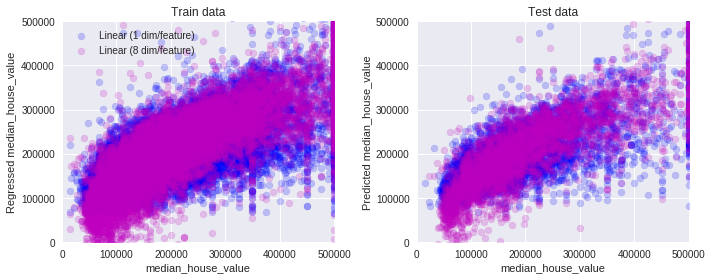

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(Y_train, lin_reg_1.predict(X_train_1), alpha=0.2,c='b', label='Linear (1 dim/feature)')
plt.scatter(Y_train, lin_reg_8.predict(X_train_8), alpha=0.2,c='m', label='Linear (8 dim/feature)')
plt.title('Train data')
plt.xlabel('median_house_value')
plt.ylabel('Regressed median_house_value');
plt.xlim(0,500000)
plt.ylim(0,500000)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(Y_test, lin_pred_1, alpha=0.2,c='b')
plt.scatter(Y_test, lin_pred_8, alpha=0.2,c='m')
plt.title('Test data')
plt.xlabel('median_house_value')
plt.ylabel('Predicted median_house_value');
plt.xlim(0,500000)
plt.ylim(0,500000)

plt.tight_layout()

Text(0, 0.5, 'median_house_value')

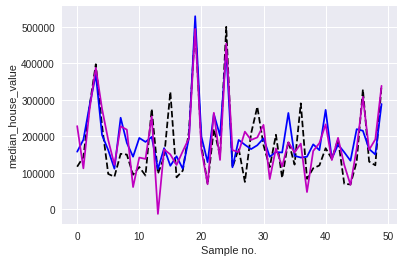

In [15]:
plt.plot(Y_test.values[:50],'--k')
plt.plot(lin_pred_1[:50],'b')
plt.plot(lin_pred_8[:50],'m')
plt.xlabel('Sample no.')
plt.ylabel('median_house_value')

## Random Forest

In [0]:
forest_reg = RandomForestRegressor(n_estimators=10)
forest_reg.fit(X_train, Y_train)
forest_pred = forest_reg.predict(X_test)

In [17]:
forest_reg.feature_importances_

array([0.16381169, 0.1543837 , 0.06357248, 0.02428114, 0.02470673,
       0.03261161, 0.01936674, 0.51726592])

median_income         0.517266
longitude             0.163812
latitude              0.154384
housing_median_age    0.063572
population            0.032612
total_bedrooms        0.024707
total_rooms           0.024281
households            0.019367
dtype: float64


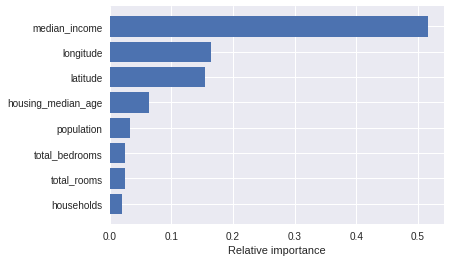

In [18]:
important_features = pd.Series(data=forest_reg.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

pos = np.linspace(7,0, len(important_features))
plt.barh(pos, important_features.values)
plt.yticks(pos, important_features.index)
plt.xlabel('Relative importance');

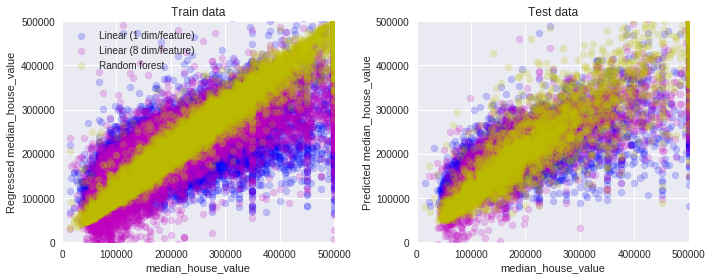

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(Y_train, lin_reg_1.predict(X_train_1), alpha=0.2,c='b', label='Linear (1 dim/feature)')
plt.scatter(Y_train, lin_reg_8.predict(X_train_8), alpha=0.2,c='m', label='Linear (8 dim/feature)')
plt.scatter(Y_train, forest_reg.predict(X_train), alpha=0.2,c='y', label='Random forest')
plt.title('Train data')
plt.xlabel('median_house_value')
plt.ylabel('Regressed median_house_value');
plt.xlim(0,500000)
plt.ylim(0,500000)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(Y_test, lin_pred_1, alpha=0.2,c='b')
plt.scatter(Y_test, lin_pred_8, alpha=0.2,c='m')
plt.scatter(Y_test, forest_pred, alpha=0.2,c='y')
plt.title('Test data')
plt.xlabel('median_house_value')
plt.ylabel('Predicted median_house_value');
plt.xlim(0,500000)
plt.ylim(0,500000)

plt.tight_layout()